
***
***
# 主题模型

***
***


![image.png](img/chengjun.png)

2014年高考前夕，百度“基于海量作文范文和搜索数据，利用概率主题模型，预测2014年高考作文的命题方向”。共分为了六个主题：时间、生命、民族、教育、心灵、发展。而每个主题下面又包括了一些具体的关键词。比如，生命的主题对应：平凡、自由、美丽、梦想、奋斗、青春、快乐、孤独。[Read more](https://site.douban.com/146782/widget/notes/15462869/note/356806087/)

<div><img src="img/txt6.png" width="1000px"></div>

## Latent Dirichlet Allocation (LDA)

LDA (潜在狄利克雷分配) is a generative model that **infers unobserved meanings** from a large set of observations. 
- Blei DM, Ng J, Jordan MI. **Latent dirichlet allocation**. J Mach Learn Res. 2003; 3: 993–1022.
- Blei DM, Lafferty JD. Correction: a correlated topic model of science. Ann Appl Stat. 2007; 1: 634. 
- Blei DM. **Probabilistic topic models**. Commun ACM. 2012; 55: 55–65.
- Chandra Y, Jiang LC, Wang C-J (2016) Mining Social Entrepreneurship Strategies Using Topic Modeling. PLoS ONE 11(3): e0151342. 


### Topic models assume that each document contains a mixture of topics.

It is impossible to directly assess the relationships between topics and documents and between topics and terms. 

- Topics are considered latent/unobserved variables that stand between the documents and terms

- What can be directly observed is the distribution of terms over documents, which is known as the document term matrix (DTM).

Topic models algorithmically identify the best set of latent variables (topics) that can best explain the observed distribution of terms in the documents. 

The DTM is further decomposed into two matrices：
- a term-topic matrix (TTM) 
- a topic-document matrix (TDM)

Each document can be assigned to a primary topic that demonstrates the highest topic-document probability and can then be linked to other topics with declining probabilities.

![image.png](img/txt7.png)

### LDA（Latent Dirichlet Allocation）是一种**文档主题**生成模型
- 三层贝叶斯概率模型，包含词、主题和文档三层结构。

**生成模型**认为一篇文章的每个词都是通过这样一个过程得到:

 以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语

- 文档到主题服从**多项式分布**，主题到词服从多项式分布。

### 多项式分布（Multinomial Distribution）是二项式分布的推广
- 二项分布的典型例子是扔硬币，硬币正面朝上概率为p, 重复扔n次硬币，k次为正面的概率即为一个二项分布概率。（严格定义见伯努利实验定义）。
- 把二项分布公式推广至多种状态，就得到了多项分布。
    - 例如在上面例子中1出现k1次，2出现k2次，3出现k3次的概率分布情况。

## LDA是一种**非监督机器学习技术**

可以用来识别大规模文档集（document collection）或语料库（corpus）中潜藏的主题信息。
- 采用了词袋（bag of words）的方法，将每一篇文档视为一个词频向量，从而将文本信息转化为了易于建模的数字信息。 
- 但是词袋方法没有考虑词与词之间的顺序，这简化了问题的复杂性，同时也为模型的改进提供了契机。
- 每一篇文档代表了一些主题所构成的一个概率分布，而每一个主题又代表了很多单词所构成的一个概率分布。

![image.png](img/txt8.png)



### 多项分布的参数服从Dirichlet分布
- Dirichlet分布是多项分布的参数的分布， 被认为是“分布上的分布”。

\begin{equation}
  \text{Dir}\left(\boldsymbol{\alpha}\right)\rightarrow \mathrm{p}\left(\boldsymbol{\theta}\mid\boldsymbol{\alpha}\right)=\frac{\Gamma\left(\sum_{i=1}^{k}\boldsymbol{\alpha}_{i}\right)}{\prod_{i=1}^{k}\Gamma\left(\boldsymbol{\alpha}_{i}\right)}\prod_{i=1}^{k}\boldsymbol{\theta}_{i}^{\boldsymbol{\alpha}_{i}-1}
\end{equation}



In [15]:
# http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters
dirichlet.pdf(quantiles, alpha)

0.2843831684937255

In [9]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [13]:
class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        
    def pdf(self, x):
        x=x/x.sum() # enforce simplex constraint
        return dirichlet.pdf(x=x,alpha=self._alpha)

In [19]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)

    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

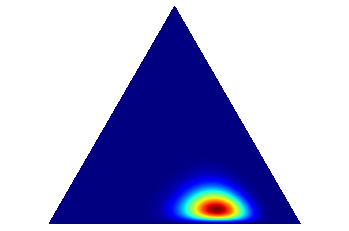

In [21]:
draw_pdf_contours(Dirichlet([10., 20., 3.]))

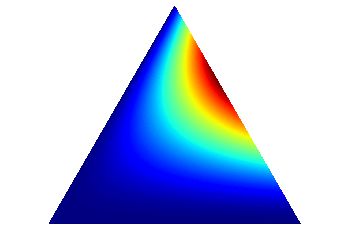

In [20]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

##  LDA的名字由来

存在两个隐含的Dirichlet分布。

- 每篇文档对应一个不同的topic分布，服从多项分布
    - topic多项分布的参数服从一个Dirichlet分布。 
- 每个topic下存在一个term的多项分布
    - term多项分布的参数服从一个Dirichlet分布。
    


Assume K topics are in D documents.

`主题在词语上的分布` Each topic is denoted with $\beta_{1:K}$， 

- 主题$\beta_K$ 是第k个主题，这个主题表达为一系列的terms。
- Each topic is a distribution of fixed words. 

`主题在文本上的分布` The topics proportion in the document *d* is denoted as $\theta_d$

- e.g., the kth topic's proportion in document d is $\theta_{d, k}$. 

`主题在文本和词上的分配`

topic models assign topics to a document and its terms. 
- The topic assigned to document *d* is denoted as $z_d$, 
- The topic assigned to the nth term in document *d* is denoted as $z_{d,n}$. 

`可以观察到的是？`

词在文档中的位置，也就是文档-词矩阵（document-term matrix）

Let $w_{d,n}$ denote the nth term in document d. 

![image.png](img/txt9.png)

`联合概率分布` According to Blei et al. the joint distribution of $\beta_{1:K}$,$\theta_{1:D}$, $z_{1:D}$ and $w_{d, n}$ plus the generative process for LDA can be expressed as:

$$ p(\beta_{1:K}, \theta_{1:D}, z_{1:D}, w_{d, n})  = $$

$$\prod_{i=1}^{K} p(\beta_i) \prod_{d =1}^D p(\theta_d)(\prod_{n=1}^N p(z_{d,n} \mid \theta_d) \times p(w_{d, n} \mid \beta_{1:K}, Z_{d, n})  ) $$

<div><img src="img/txt10.png" align="right"></div>

![image.png](img/txt11.png)


**后验分布** Note that $\beta_{1:k},\theta_{1:D},and z_{1:D}$ are latent, unobservable variables. Thus, the computational challenge of LDA is to compute the conditional distribution of them given the observable specific words in the documents $w_{d, n}$. 

Accordingly, the posterior distribution of LDA can be expressed as:

$$p(\beta_{1:K}, \theta_{1:D}, z_{1:D} \mid w_{d, n}) = \frac{p(\beta_{1:K}, \theta_{1:D}, z_{1:D}, w_{d, n})}{p(w_{1:D})}$$

Because the number of possible topic structures is exponentially large, it is impossible to compute the posterior of LDA. 

Topic models aim to develop efficient algorithms to **approximate** the posterior of LDA. There are two categories of algorithms: 
- sampling-based algorithms
- variational algorithms 



### Gibbs sampling
In statistics, Gibbs sampling or a Gibbs sampler is a **Markov chain Monte Carlo (MCMC)** algorithm for obtaining a sequence of observations which are approximated from a specified **multivariate probability distribution**, when direct sampling is difficult. 

Using the Gibbs sampling method, we can build a Markov chain for the sequence of random variables (see Eq 1). 

The sampling algorithm is applied to the chain to sample from the limited distribution, and it approximates the **posterior**. 


# Gensim: Topic modelling for humans



Gensim is developed by Radim Řehůřek,who is a machine learning researcher and consultant in the Czech Republic. We must start by installing it. We can achieve this by running the following command:

> # pip install gensim


In [22]:
%matplotlib inline
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

# Download data

<del>http://www.cs.princeton.edu/~blei/lda-c/ap.tgz</del>

http://www.cs.columbia.edu/~blei/lda-c/

Unzip the data and put them into your folder, e.g., /Users/datalab/bigdata/ap/

In [23]:
# Load the data
corpus = corpora.BleiCorpus('/Users/datalab/bigdata/ap/ap.dat',\
                            '/Users/datalab/bigdata/ap/vocab.txt')

# 使用help命令理解corpora.BleiCorpus函数

> help(corpora.BleiCorpus)

In [24]:
# 使用dir看一下有corpus有哪些子函数？
dir(corpus)[-10:]

['docbyoffset',
 'fname',
 'id2word',
 'index',
 'length',
 'line2doc',
 'load',
 'save',
 'save_corpus',
 'serialize']

In [25]:
# corpus.id2word is a dict which has keys and values, e.g., 
{0: u'i', 1: u'new', 2: u'percent', 3: u'people', 4: u'year', 5: u'two'}

{0: 'i', 1: 'new', 2: 'percent', 3: 'people', 4: 'year', 5: 'two'}

In [26]:
# transform the dict to list using items()
corpusList = list(corpus.id2word.items())

In [27]:
# show the first 5 elements of the list
corpusList[:5]

[(0, 'i'), (1, 'new'), (2, 'percent'), (3, 'people'), (4, 'year')]

# Build the topic model

In [28]:
# 设置主题数量
NUM_TOPICS = 100

In [29]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, 
    id2word=corpus.id2word, 
    alpha=None)

# help(models.ldamodel.LdaModel)

Help on class LdaModel in module gensim.models.ldamodel:

class LdaModel(gensim.interfaces.TransformationABC, gensim.models.basemodel.BaseTopicModel)
- The constructor estimates Latent Dirichlet Allocation model parameters based on a training corpus:
 
> lda = LdaModel(corpus, num_topics=10)
 
- You can then infer topic distributions on new, unseen documents, with

> doc_lda = lda[doc_bow]  

- The model can be updated (trained) with new documents via

> lda.update(other_corpus)

In [30]:
# 看一下训练出来的模型有哪些函数？
' '.join(dir(model))

'__class__ __delattr__ __dict__ __dir__ __doc__ __eq__ __format__ __ge__ __getattribute__ __getitem__ __gt__ __hash__ __init__ __init_subclass__ __le__ __lt__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound callbacks chunksize clear decay diff dispatcher distributed do_estep do_mstep dtype eta eval_every expElogbeta gamma_threshold get_document_topics get_term_topics get_topic_terms get_topics id2word inference init_dir_prior iterations load log_perplexity minimum_phi_value minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes per_word_topics print_topic print_topics random_state save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

# We can see the list of topics a document refers to 

by using the model[doc] syntax:

In [31]:
document_topics = [model[c] for c in corpus]

In [32]:
# how many topics does one document cover?
# 例如，对于文档2来说，他所覆盖的主题和比例如下：
document_topics[2]

[(2, 0.048023984),
 (7, 0.067052096),
 (22, 0.078788824),
 (31, 0.049663354),
 (34, 0.0149856135),
 (39, 0.022489905),
 (42, 0.010858211),
 (53, 0.041905038),
 (61, 0.033337574),
 (68, 0.04844338),
 (72, 0.012781475),
 (75, 0.016759546),
 (78, 0.4995139),
 (85, 0.024694487)]

In [33]:
# The first topic
# 对于主题0而言，它所对应10个词语和比重如下：
model.show_topic(55, 20)

[('salvadoran', 0.016505657),
 ('feared', 0.009027323),
 ('priests', 0.006627582),
 ('supreme', 0.0062730736),
 ('court', 0.0058254534),
 ('cesar', 0.0057329326),
 ('anc', 0.005718951),
 ('two', 0.005506124),
 ('executed', 0.005237348),
 ('mandelas', 0.0049420297),
 ('i', 0.004933451),
 ('convicted', 0.0043522445),
 ('trial', 0.0042409007),
 ('new', 0.0038077259),
 ('murdering', 0.00376128),
 ('participated', 0.0036495375),
 ('teeth', 0.0035992293),
 ('states', 0.003568108),
 ('million', 0.003400971),
 ('mandela', 0.003306418)]

In [35]:
# 对于主题0而言，它所对应10个词语和比重如下：
words = model.show_topic(0, 10)
words

[('soviet', 0.014213265),
 ('heat', 0.010803085),
 ('people', 0.008755475),
 ('electricity', 0.008300867),
 ('waters', 0.006102835),
 ('reported', 0.0059347493),
 ('kabul', 0.005585455),
 ('afghan', 0.005549842),
 ('assaults', 0.0052388334),
 ('government', 0.0051779784)]

In [36]:
for f, w in words[:10]:
    print(f, w)

soviet 0.014213265
heat 0.010803085
people 0.008755475
electricity 0.008300867
waters 0.006102835
reported 0.0059347493
kabul 0.005585455
afghan 0.005549842
assaults 0.0052388334
government 0.0051779784


In [37]:
# 对于主题99而言，它所对应10个词语和比重如下：

model.show_topic(99, 10)

[('lenders', 0.007934938),
 ('chinese', 0.006651945),
 ('security', 0.006582973),
 ('new', 0.006525414),
 ('village', 0.0055111744),
 ('police', 0.005486252),
 ('group', 0.0054585696),
 ('program', 0.0054052803),
 ('chains', 0.004982714),
 ('united', 0.004855675)]

In [38]:
# 模型计算出来的所有的主题当中的第1个是？
model.show_topic(0)

[('soviet', 0.014213265),
 ('heat', 0.010803085),
 ('people', 0.008755475),
 ('electricity', 0.008300867),
 ('waters', 0.006102835),
 ('reported', 0.0059347493),
 ('kabul', 0.005585455),
 ('afghan', 0.005549842),
 ('assaults', 0.0052388334),
 ('government', 0.0051779784)]

In [39]:
#help(model.show_topics(0))
for w, f in words:
    print(w, f)

soviet 0.014213265
heat 0.010803085
people 0.008755475
electricity 0.008300867
waters 0.006102835
reported 0.0059347493
kabul 0.005585455
afghan 0.005549842
assaults 0.0052388334
government 0.0051779784


In [46]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(f for w, f in words)
    with open('/Users/chengjun/github/workshop/data/topics_term_weight.txt', 'a') as output:
        for w, f in words:
            line = str(ti) + '\t' +  w + '\t' + str(f/tf) 
            output.write(line + '\n')

# Find the most discussed topic

i.e., the one with the highest total weight

In [40]:
## Convert corpus into a dense np array 
help(matutils.corpus2dense)

Help on function corpus2dense in module gensim.matutils:

corpus2dense(corpus, num_terms, num_docs=None, dtype=<class 'numpy.float32'>)
    Convert corpus into a dense numpy 2D array, with documents as columns.
    
    Parameters
    ----------
    corpus : iterable of iterable of (int, number)
        Input corpus in the Gensim bag-of-words format.
    num_terms : int
        Number of terms in the dictionary. X-axis of the resulting matrix.
    num_docs : int, optional
        Number of documents in the corpus. If provided, a slightly more memory-efficient code path is taken.
        Y-axis of the resulting matrix.
    dtype : data-type, optional
        Data type of the output matrix.
    
    Returns
    -------
    numpy.ndarray
        Dense 2D array that presents `corpus`.
    
    See Also
    --------
    :class:`~gensim.matutils.Dense2Corpus`
        Convert dense matrix to Gensim corpus format.



In [41]:
topics = matutils.corpus2dense(model[corpus], 
                               num_terms=model.num_topics)
topics

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4285222 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0132917 , 0.04585509, ..., 0.2665006 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1297617 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [42]:
# Return the sum of the array elements 
help(topics.sum)

Help on built-in function sum:

sum(...) method of numpy.ndarray instance
    a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)
    
    Return the sum of the array elements over the given axis.
    
    Refer to `numpy.sum` for full documentation.
    
    See Also
    --------
    numpy.sum : equivalent function



In [43]:
# 第一个主题的词语总权重
topics[0].sum()

12.804762

In [44]:
# 将每一个主题的词语总权重算出来
weight = topics.sum(1)
weight

array([ 12.804762  ,  46.931618  ,  59.26241   ,   2.2143471 ,
         0.67802817,   2.2622046 ,   3.0233366 ,  17.583002  ,
         6.1049767 ,  31.3768    ,   5.187127  ,  19.628056  ,
        28.910555  ,  10.1352    ,  50.009346  ,  15.996473  ,
         5.852129  ,   8.703129  ,  27.550959  ,   1.7105172 ,
        34.74263   ,  10.605288  ,   8.8306265 ,   6.129652  ,
        32.472363  ,  17.814533  ,  30.612034  ,   3.6717734 ,
         1.3829954 ,   6.2177258 ,   4.56864   ,  60.068176  ,
        15.500901  ,   2.0661712 ,  61.25909   ,  30.734415  ,
        26.266684  ,   9.214224  ,  45.01914   ,   8.051634  ,
        21.10302   ,   7.245178  ,   6.3920393 ,   9.723191  ,
        12.641086  ,   5.443553  ,   7.4248734 ,  20.882336  ,
         3.1587074 ,  68.153     ,  13.018834  ,  20.467255  ,
        11.351901  ,  11.534626  ,  27.307915  ,   4.6151204 ,
        22.742682  ,  11.901951  ,  18.917133  ,   3.0844703 ,
        30.553188  ,  23.919426  ,   9.98344   ,   0.15

In [45]:
# 找到最大值在哪里

help(weight.argmax)  

Help on built-in function argmax:

argmax(...) method of numpy.ndarray instance
    a.argmax(axis=None, out=None)
    
    Return indices of the maximum values along the given axis.
    
    Refer to `numpy.argmax` for full documentation.
    
    See Also
    --------
    numpy.argmax : equivalent function



In [46]:
# 找出具有最大权重的主题是哪一个
max_topic = weight.argmax()
print(max_topic)

82


In [47]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)
words = np.array(words).T
words_freq=[float(i)*10000000 for i in words[1]]
words = list(zip(words[0], words_freq))

# 主题词云

In [48]:
words = {i:j for i, j in words}

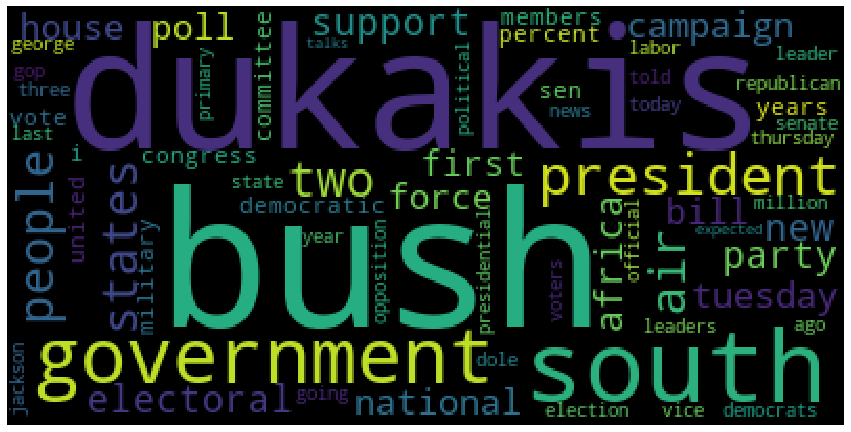

In [49]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(15, 8),facecolor='white')

wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 每个文档有多少主题


In [50]:
# 每个文档有多少主题
num_topics_used = [len(model[doc]) for doc in corpus]


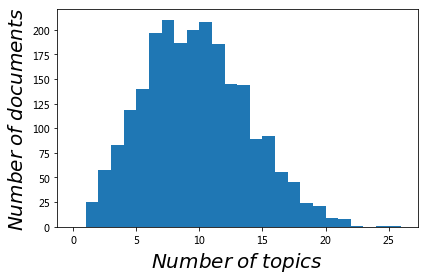

In [51]:
# 画出来每个文档主题数量的直方图

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(27))
ax.set_ylabel('$Number \;of\; documents$', fontsize = 20)
ax.set_xlabel('$Number \;of \;topics$', fontsize = 20)
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

### We can see that about 150 documents have 5 topics, 
- while the majority deal with around 10 to 12 of them. 
    - No document talks about more than 30 topics.

# 改变超级参数alpha

In [52]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, 
    alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

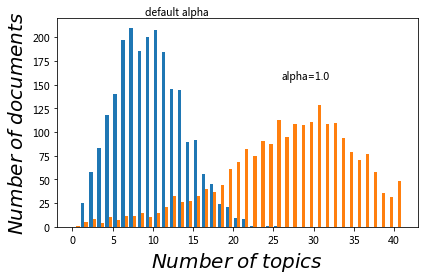

In [53]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('$Number \;of\; documents$', fontsize = 20)
ax.set_xlabel('$Number \;of \;topics$', fontsize = 20)
# The coordinates below were fit by trial and error to look good
plt.text(9, 223, r'default alpha')
plt.text(26, 156, 'alpha=1.0')
fig.tight_layout()

# 问题：$\alpha$引起主题数量分布的变化意味着什么？

# 从原始文本到主题模型：一个完整的例子

刚才的例子使用的是一个已经处理好的语料库，已经构建完整的语料和字典，并清洗好了数据。

In [54]:
with open('/Users/datalab/bigdata/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [55]:
# 需要进行文本清洗
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [56]:
# 如果包含'<'就去掉这一行
dat[4].strip()[0]

'<'

In [57]:
# 选取前100篇文档
docs = []
for k, i in enumerate(dat): #[:100]:
    #print(k)
    try:
        if i.strip()[0] != '<':
            docs.append(i)
    except Exception as e:
        print(k, e)

6897 string index out of range
9183 string index out of range


In [58]:
len(docs)

2248

In [59]:
docs[-1]

' A Navy anti-submarine helicopter crashed while preparing to land on a frigate in the North Arabian Sea and its three crewmen were presumed dead, officials announced Friday. The SH-2F helicopter was returning to the USS Barbey at the end of a dawn flight and crashed on approach, said Ken Mitchell, spokesman for North Island Naval Air Station. The Barbey is based at San Diego. The crash occurred about 7 p.m. PST Thursday, Mitchell said. Lost and presumed dead were Lt. Cmdr. Gerald C. Pelz, 37, of Coronado, Calif., Lt. j.g. Gerald T. Ramsdell, age unknown, of Ridgewood, N.J., and the anti-submarine warfare operator, Petty Officer 3rd Class William E. Martinie, 24, of Peoria, Ill. Helicopters from the aircraft carrier USS Nimitz, 70 miles away, and boats from the Barbey and USS California unsuccessfully searched for survivors. The craft was part of Helicopter Anti-Submarine Squadron Light 33.\n'

In [60]:
# 定义一个函数，进一步清洗
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [61]:
texts = [[i for i in doc.lower().split()] for doc in docs]

## 停用词

In [62]:
import nltk
#nltk.download()
# 会打开一个窗口，选择book，download，待下载完毕就可以使用了。

In [63]:
from nltk.corpus import stopwords
stop = stopwords.words('english') # 如果此处出错，请执行上一个block的代码
# 停用词stopword：在英语里面会遇到很多a,the,or等使用频率很多的字或词,常为冠词、介词、副词或连词等。
# 人类语言包含很多功能词。与其他词相比，功能词没有什么实际含义。

In [64]:
' '.join(stop) 

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

In [65]:
from gensim.parsing.preprocessing import STOPWORDS

' '.join(STOPWORDS)

'done see together just serious from become seeming system sincere wherever well above ie etc will inc afterwards only do already how always herself too whoever onto some go twelve least few him which say last yourself ourselves show didn twenty beside seem everyone he myself more doesn latterly enough own the themselves cannot where cant thru never not anyhow must now neither your hundred really quite whereupon became herein describe as his them mine detail sixty during why was otherwise of eleven with de fifteen or fire whereafter ltd sometime bottom someone since eg among further becoming about off thin per this whenever something various whence hereby name whither my re another behind such five ten toward mill first did often in our were that please thereby after nor via until everywhere hers moreover doing whom a same most before us they her without made although who back former unless you wherein i himself mostly around thereupon latter though may however along find other if agai

In [66]:
stop.append('said')

In [67]:
# 计算每一个词的频数
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

In [68]:
# 去掉只出现一次的词和
texts = [[token for token in text \
          if frequency[token] > 1 and token not in stop]
        for text in texts]

In [69]:
docs[8]

' Here is a summary of developments in forest and brush fires in Western states:\n'

In [70]:
' '.join(texts[9])

'stirbois 2 man extreme-right national front party leader jean-marie le pen died saturday automobile accident police 43 stirbois attended political meeting friday city dreux 60 miles west paris traveling toward capital car ran road smashed tree 2:40 police stirbois secretary-general national front member party leadership since 1981 born jan 30 1945 paris held degrees law marketing headed printing business stirbois active several extreme-right political movements joining national front 1977 1982 126 percent vote local elections district west paris highest vote percentage france right-wing candidate year half later election deputy mayor dreux stirbois elected deputy national assembly 1986 lost seat legislative elections last summer national front founded le pen 1972 strongly opposed frances highly centralized bureaucratic government personal taxes favors death penalty priority french citizens jobs stopping immigration first round years presidential elections le pen surprising 144 percent

# help(corpora.Dictionary)

Help on class Dictionary in module gensim.corpora.dictionary:

class Dictionary(gensim.utils.SaveLoad, _abcoll.Mapping)
- Dictionary encapsulates the mapping between normalized words and their integer ids.
  
- The main function is **doc2bow**
    - which converts a collection of words to its bag-of-words representation: a list of (word_id, word_frequency) 2-tuples.
 

In [71]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
# The function doc2bow() simply counts the number of occurences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector. 

In [72]:
NUM_TOPICS = 100
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, 
    id2word=dictionary, alpha=None)

# 使用pyLDAvis可视化主题模型
http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

> # pip install pyldavis

In [74]:
pip install pyldavis

Processing /Users/datalab/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414/pyLDAvis-2.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 548 kB 617 kB/s eta 0:00:01
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c6d0439921d3af5dd3b061cf33fd4b2c1767a4d4fafa2e7923791441d9f79e6c
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/3c/33/97/805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built funcy
Note: you may need to restart the kernel to use updated packages.


In [75]:
# pyldavis
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary, mds = 'mmds')

pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [83]:
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary, mds = 'tsne')

pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [28]:
pyLDAvis.show(ap_data)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [14/Jun/2019 17:10:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2019 17:10:48] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2019 17:10:48] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2019 17:10:48] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2019 17:10:48] code 404, message Not Found
127.0.0.1 - - [14/Jun/2019 17:10:48] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


In [27]:
pyLDAvis.save_html(ap_data, '../data/ap_ldavis2.html')

![image.png](img/chengjun2.png)

# 对2016年政府工作报告建立主题模型

# pip install jieba
> https://github.com/fxsjy/jieba

# pip install wordcloud
>  https://github.com/amueller/word_cloud

# pip install gensim

In [73]:
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib
matplotlib.rc("savefig", dpi=400)
#matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 

In [40]:
import urllib2
from bs4 import BeautifulSoup
import sys

url2016 = 'http://news.xinhuanet.com/fortune/2016-03/05/c_128775704.htm'
content = urllib2.urlopen(url2016).read()
soup = BeautifulSoup(content) 


In [41]:
gov_report_2016 = [s.text for s in soup('p')]
for i in gov_report_2016[:10]:
    print(i)

政府工作报告
——2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出意见。
　　一、2015年工作回顾
　　过去一年，我国发展面临多重困难和严峻挑战。在以习近平同志为总书记的党中央坚强领导下，全国各族人民以坚定的信心和非凡的勇气，攻坚克难，开拓进取，经济社会发展稳中有进、稳中有好，完成了全年主要目标任务，改革开放和社会主义现代化建设取得新的重大成就。
　　——经济运行保持在合理区间。国内生产总值达到67.7万亿元，增长6.9%，在世界主要经济体中位居前列。粮食产量实现"十二连增"，居民消费价格涨幅保持较低水平。特别是就业形势总体稳定，城镇新增就业1312万人，超过全年预期目标，成为经济运行的一大亮点。
　　——结构调整取得积极进展。服务业在国内生产总值中的比重上升到50.5%，首次占据"半壁江山"。消费对经济增长的贡献率达到66.4%。高技术产业和装备制造业增速快于一般工业。单位国内生产总值能耗下降5.6%。
　　——发展新动能加快成长。创新驱动发展战略持续推进，互联网与各行业加速融合，新兴产业快速增长。大众创业、万众创新蓬勃发展，全年新登记注册企业增长21.6%，平均每天新增1.2万户。新动能对稳就业、促升级发挥了突出作用，正在推动经济社会发生深刻变革。


In [42]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt

In [43]:
gov_report_2016 = [clean_txt(i) for i in gov_report_2016]


In [109]:
len(gov_report_2016)

109

In [110]:
for i in gov_report_2016[:10]:
    print(i)

政府工作报告
  2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在 我代表国务院 向大会报告政府工作 请予审议 并请全国政协各位委员提出意见 
　　一 2015年工作回顾
　　过去一年 我国发展面临多重困难和严峻挑战 在以习近平同志为总书记的党中央坚强领导下 全国各族人民以坚定的信心和非凡的勇气 攻坚克难 开拓进取 经济社会发展稳中有进 稳中有好 完成了全年主要目标任务 改革开放和社会主义现代化建设取得新的重大成就 
　　  经济运行保持在合理区间 国内生产总值达到67.7万亿元 增长6.9% 在世界主要经济体中位居前列 粮食产量实现"十二连增" 居民消费价格涨幅保持较低水平 特别是就业形势总体稳定 城镇新增就业1312万人 超过全年预期目标 成为经济运行的一大亮点 
　　  结构调整取得积极进展 服务业在国内生产总值中的比重上升到50.5% 首次占据"半壁江山" 消费对经济增长的贡献率达到66.4% 高技术产业和装备制造业增速快于一般工业 单位国内生产总值能耗下降5.6% 
　　  发展新动能加快成长 创新驱动发展战略持续推进 互联网与各行业加速融合 新兴产业快速增长 大众创业 万众创新蓬勃发展 全年新登记注册企业增长21.6% 平均每天新增1.2万户 新动能对稳就业 促升级发挥了突出作用 正在推动经济社会发生深刻变革 


In [111]:
len(gov_report_2016[5:-1])

103

In [112]:
# Set the Working Directory 
import os
os.getcwd() 
os.chdir('/Users/chengjun/github/cjc/')
os.getcwd()

'/Users/chengjun/GitHub/cjc'

In [113]:
filename = 'data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [114]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10

In [118]:
import jieba.analyse

def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)


In [119]:
def getCorpus(data):
    processed_docs = [tokenize(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print ("In the corpus there are", len(word_count_dict), "unique tokens")
    word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
    print ("After filtering, in the corpus there are only", len(word_count_dict), "unique tokens")
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict


def getCnCorpus(data):
    processed_docs = [cleancntxt(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print ("In the corpus there are", len(word_count_dict), "unique tokens")
    #word_count_dict.filter_extremes(no_below=5, no_above=0.2) 
    # word must appear >5 times, and no more than 10% documents
    print ("After filtering, in the corpus there are only", len(word_count_dict), "unique tokens")
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict




In [120]:
def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

def fastInferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=bag_of_words_corpus, num_topics=num, \
                                                        id2word=word_count_dict,\
                                                        workers=None, chunksize=2000, passes=2, \
                                                        batch=False, alpha='symmetric', eta=None, \
                                                        decay=0.5, offset=1.0, eval_every=10, \
                                                        iterations=50, gamma_threshold=0.001, random_state=None)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

In [116]:
import jieba.analyse

jieba.add_word(u'屠呦呦', freq=None, tag=None)
#del_word(word) 

print (' '.join(cleancntxt(u'屠呦呦获得了诺贝尔医学奖。', stopwords)))

屠呦呦 获得 诺贝尔 医学奖


In [117]:
import gensim

processed_docs = [cleancntxt(doc, stopwords) for doc in gov_report_2016[5:-1]]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print ("In the corpus there are", len(word_count_dict), "unique tokens")
# word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
# print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]



In the corpus there are 2622 unique tokens


In [118]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
#lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)

In [65]:
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 10, 15, 20, 25, 30 ]]

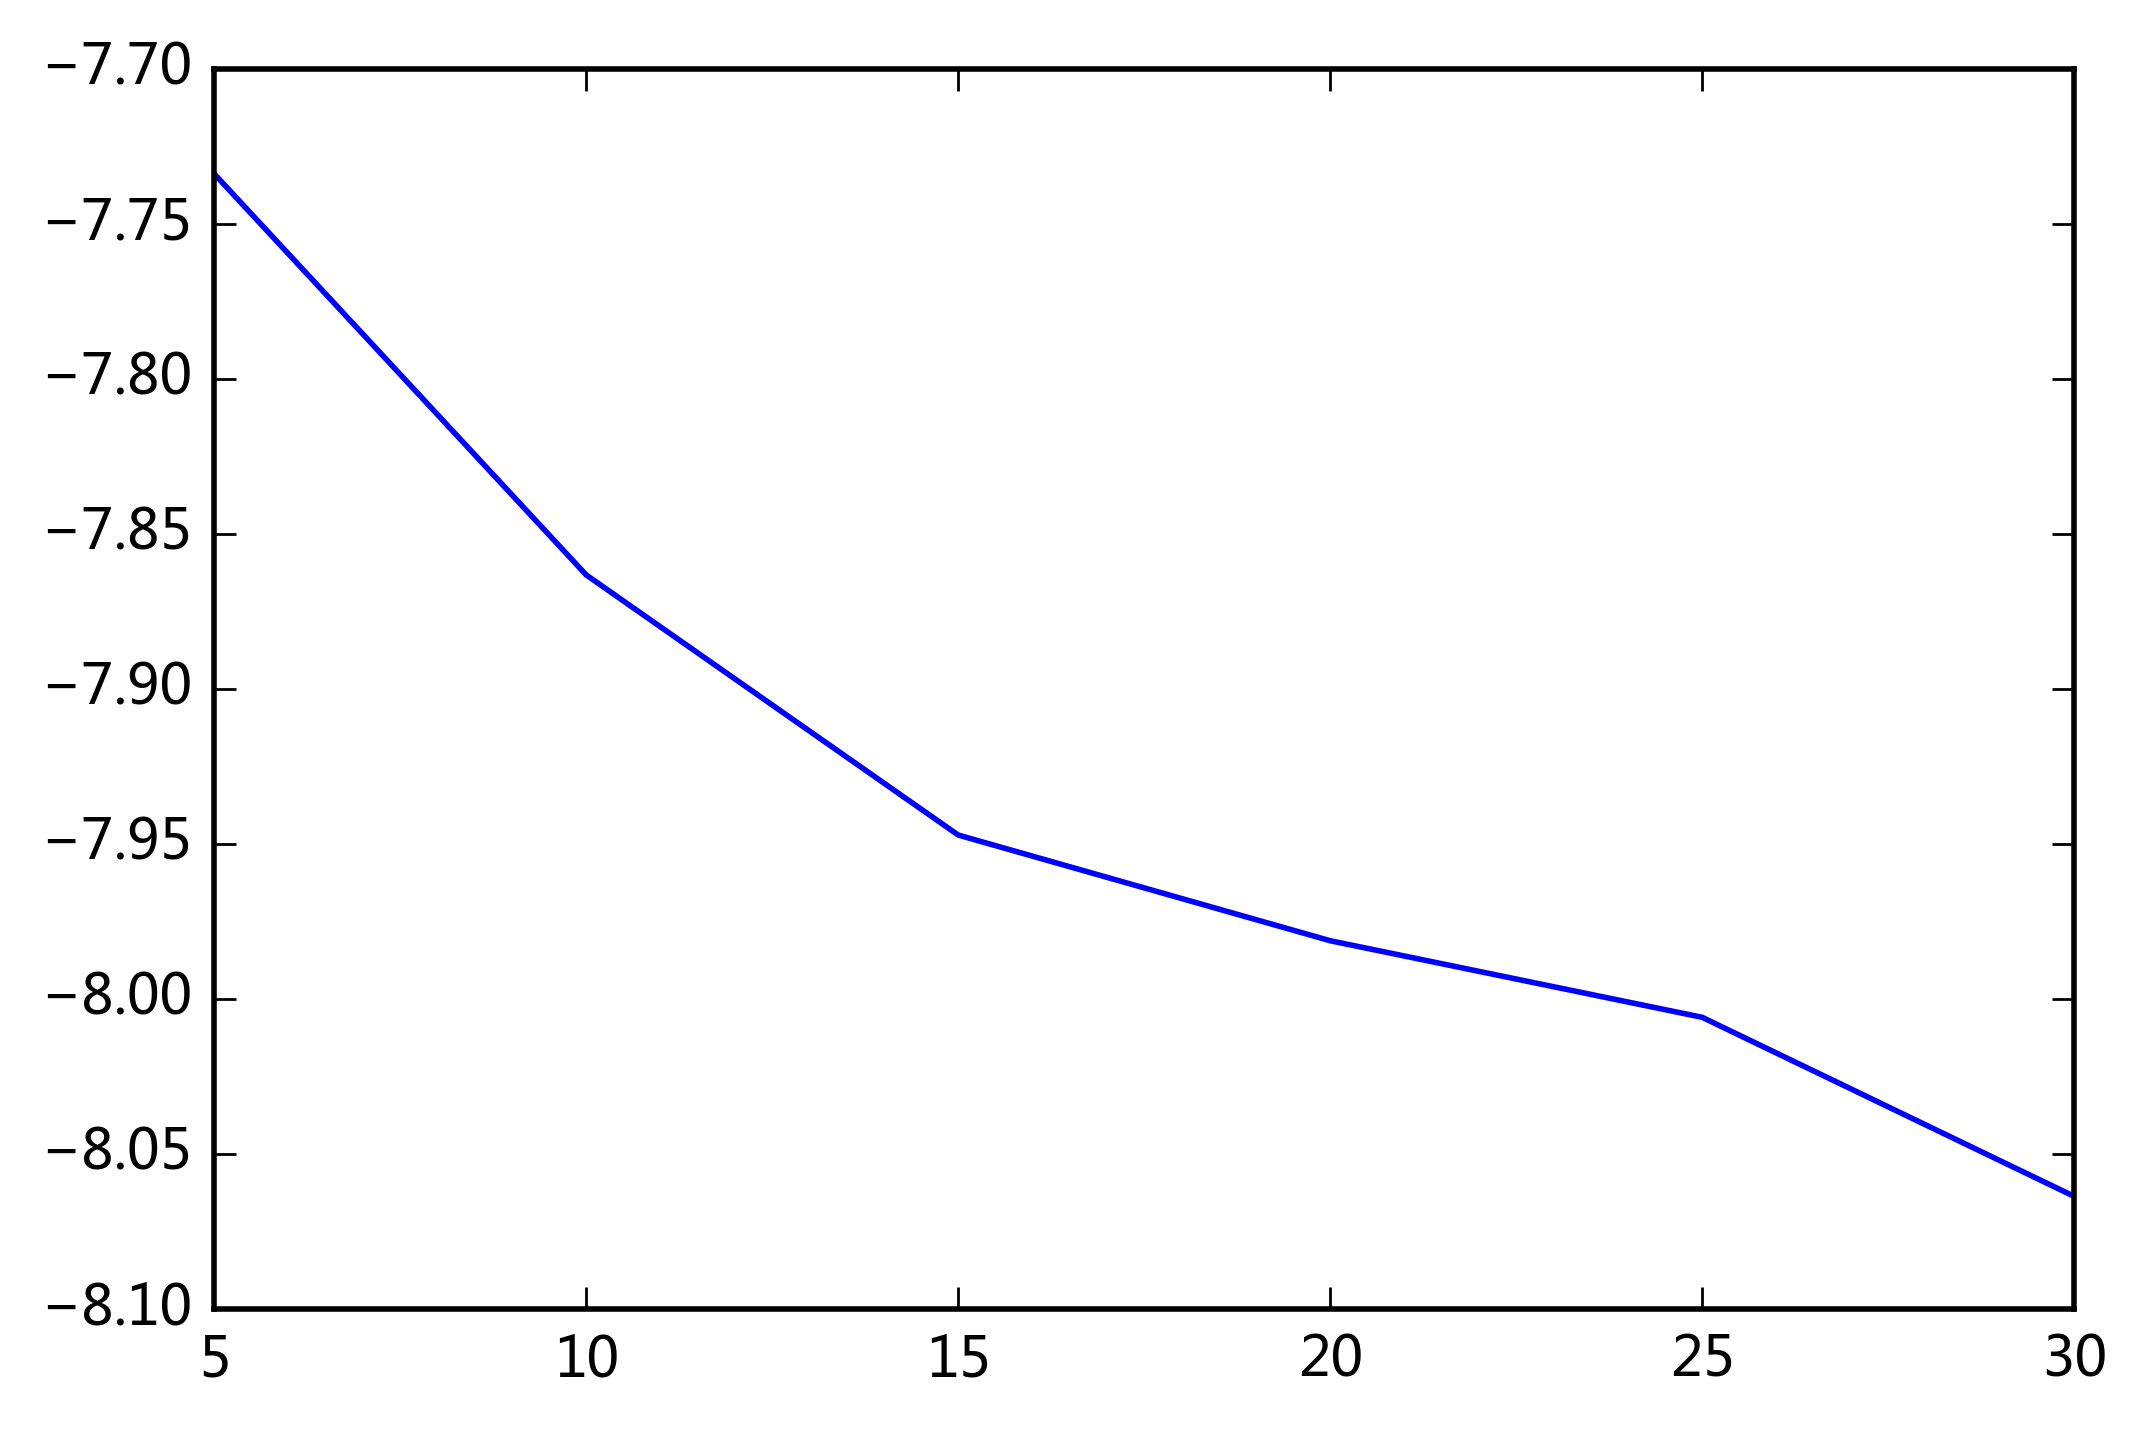

In [67]:
plt.plot([5, 10, 15, 20, 25, 30 ], perplexity_list)
plt.show()

In [119]:
lda_model.print_topics(3)


[(15,
  u'0.005*"\u5c31\u4e1a" + 0.003*"\u56fd\u6709\u4f01\u4e1a" + 0.002*"\u8c08\u5224" + 0.002*"\u81ea\u8d38\u533a" + 0.002*"\u534f\u5b9a" + 0.002*"\u91d1\u878d" + 0.002*"\u56fd\u6709\u8d44\u4ea7" + 0.002*"\u5e02\u573a\u5316" + 0.002*"\u521b\u4e1a" + 0.002*"\u5747\u8861"'),
 (8,
  u'0.005*"\u4ee5\u4e0b" + 0.004*"\u4e00\u5e74" + 0.003*"\u4e3b\u8981" + 0.003*"\u533b\u4fdd" + 0.002*"\u6559\u80b2" + 0.002*"\u533b\u7597" + 0.002*"\u5b66\u6821" + 0.002*"\u514d\u9664" + 0.002*"\u5b66\u6742\u8d39" + 0.002*"C919"'),
 (10,
  u'0.004*"\u4e24\u5cb8" + 0.004*"\u9700\u6c42" + 0.003*"\u6295\u8d44" + 0.002*"\u6210\u7ee9" + 0.002*"\u767e\u5206\u70b9" + 0.002*"\u6709\u6548" + 0.002*"\u8fd9\u4e9b" + 0.002*"\u9532\u800c\u4e0d\u820d" + 0.002*"\u8150\u8d25\u5206\u5b50" + 0.002*"\u89c4\u5b9a"')]

In [120]:
topictermlist = lda_model.print_topics(-1)
top_words = [[j.split('*')[1] for j in i[1].split(' + ')] for i in topictermlist] 
for i in top_words: 
    print (" ".join(i) )

"创新" "企业" "创业" "党风廉政" "财政支出" "就业" "经济运行" "全年" "范围" "所有"
"更加" "支付" "取消" "审批" "存款" "如期" "光明" "美好" "前景" "将会"
"海洋" "合作" "地区" "产能" "支持" "金融" "存在" "一些" "去年" "基金"
"财政赤字" "领导人" "论坛" "安排" "亿元" "峰会" "地方" "债券" "联合国" "万亿元"
"万公里" "农村" "城乡" "救助" "里程" "协调" "重大" "覆盖" "主要" "突出"
"农业" "提高" "加快" "改革" "实施" "保护" "政策" "人民" "基本" "民族"
"住房" "考虑" "就业" "6.5" "文化" "预期" "相衔接" "有利于" "全民" "补贴"
"节能" "环保" "消费" "国民经济" "第十三个" "增长" "国内" "规划" "生产总值" "五年"
"以下" "一年" "主要" "医保" "教育" "医疗" "学校" "免除" "学杂费" "C919"
"军队" "国防" "强军" "政治" "领导" "一年" "领域" "鱼水情深" "战备" "武装警察"
"两岸" "需求" "投资" "成绩" "百分点" "有效" "这些" "锲而不舍" "腐败分子" "规定"
"2016" "重点" "回顾" "八个" "2015" "脱贫" "扶贫" "做好" "接受" "今年"
"民生" "非公有制" "时期" "十三" "举措" "竞争" "任务" "对外开放" "重大" "主要"
"各位" "代表" "安全" "伟大" "民主" "作出" "富强" "聚力" "紧密" "复兴"
"合作" "依法" "地方" "作用" "宗教" "大国" "产能" "关系" "政府" "维护"
"就业" "国有企业" "谈判" "自贸区" "协定" "金融" "国有资产" "市场化" "创业" "均衡"
"2020" "万元" "外商投资" "强国" "环境治理" "强力" "下决心" "事关" "双赢" "一批"
"13" "意识" "干事" "服务业" "辉煌成就" "左右" "货币政策" "制造" "广大干部" "品质"
"港澳" "居民" "自贸" "香港" "实际" "亿美元" "勇气" "重大

In [121]:
top_words_shares = [[j.split('*')[0] for j in i[1].split(' + ')] for i in topictermlist] 
top_words_shares = [map(float, i) for i in top_words_shares]
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (20.0, 8.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 15)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*1000))
        n += 1

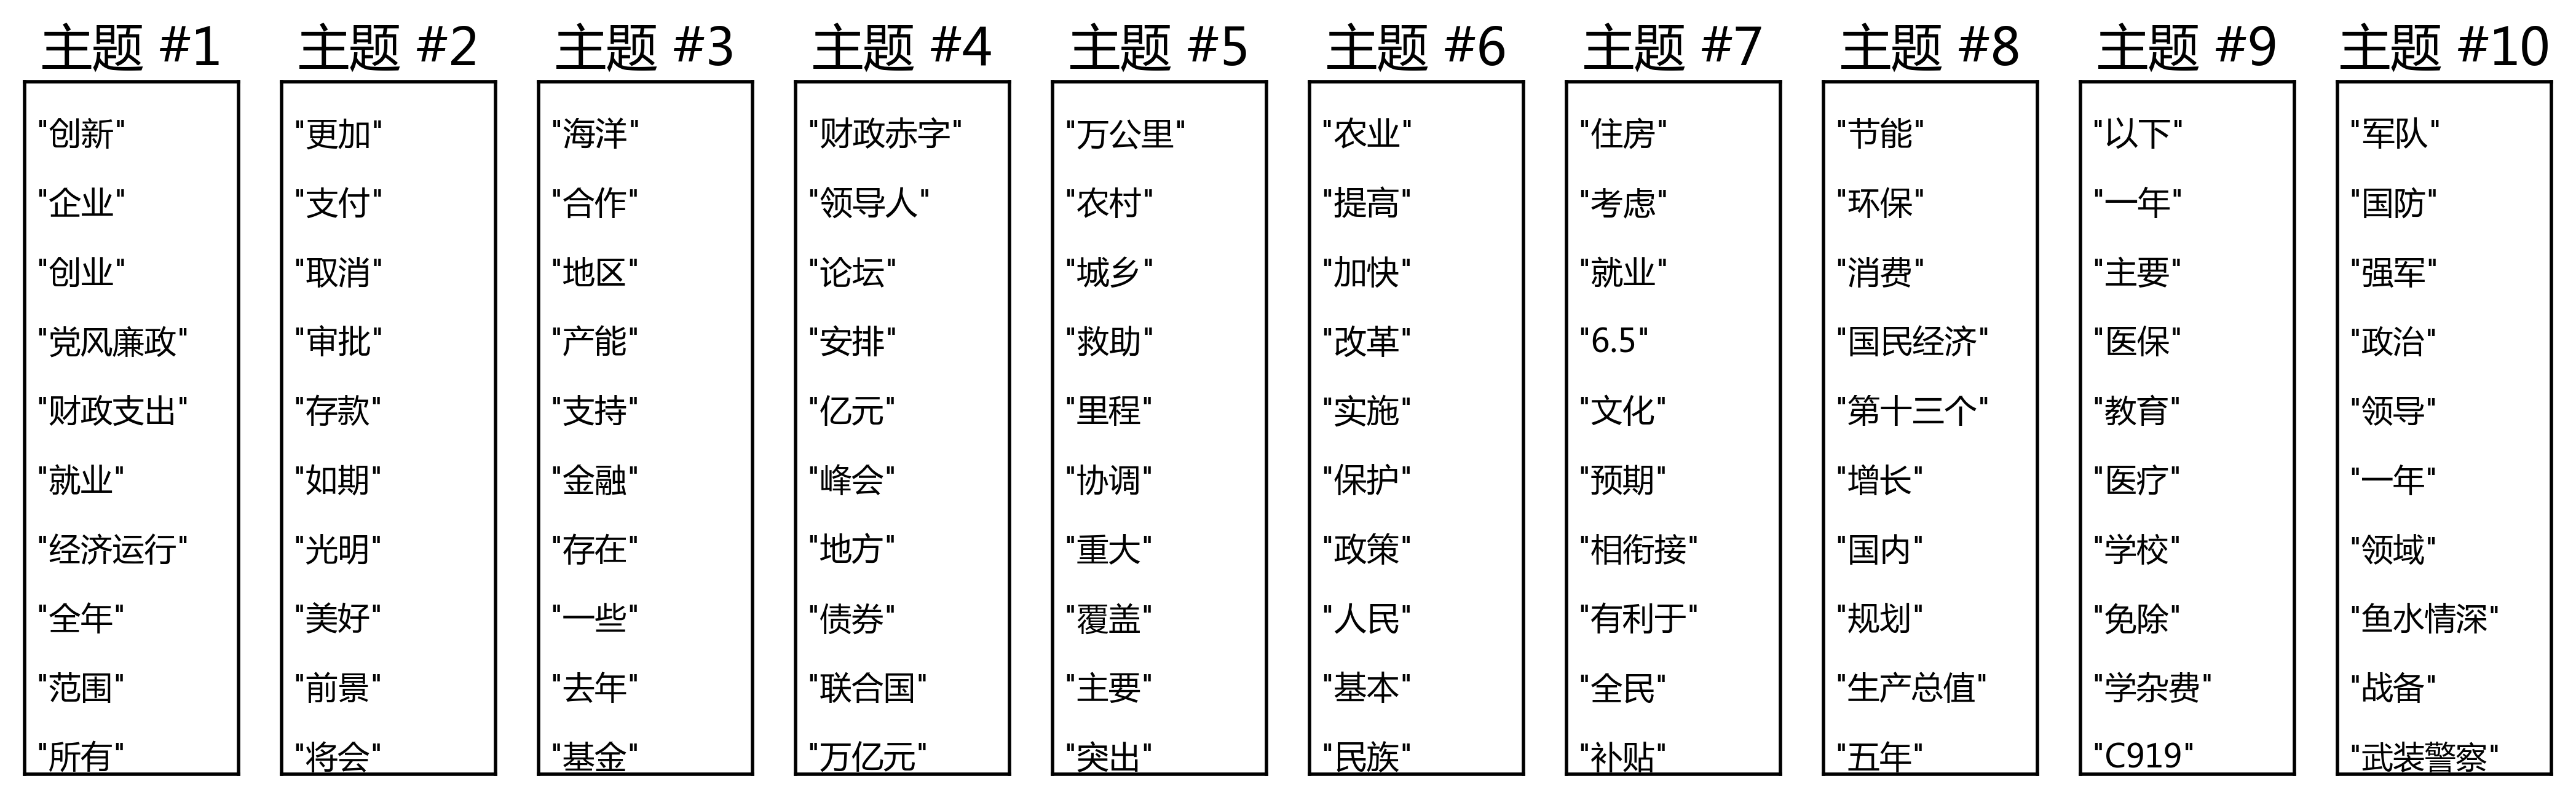

In [122]:
plotTopics(0, 10)


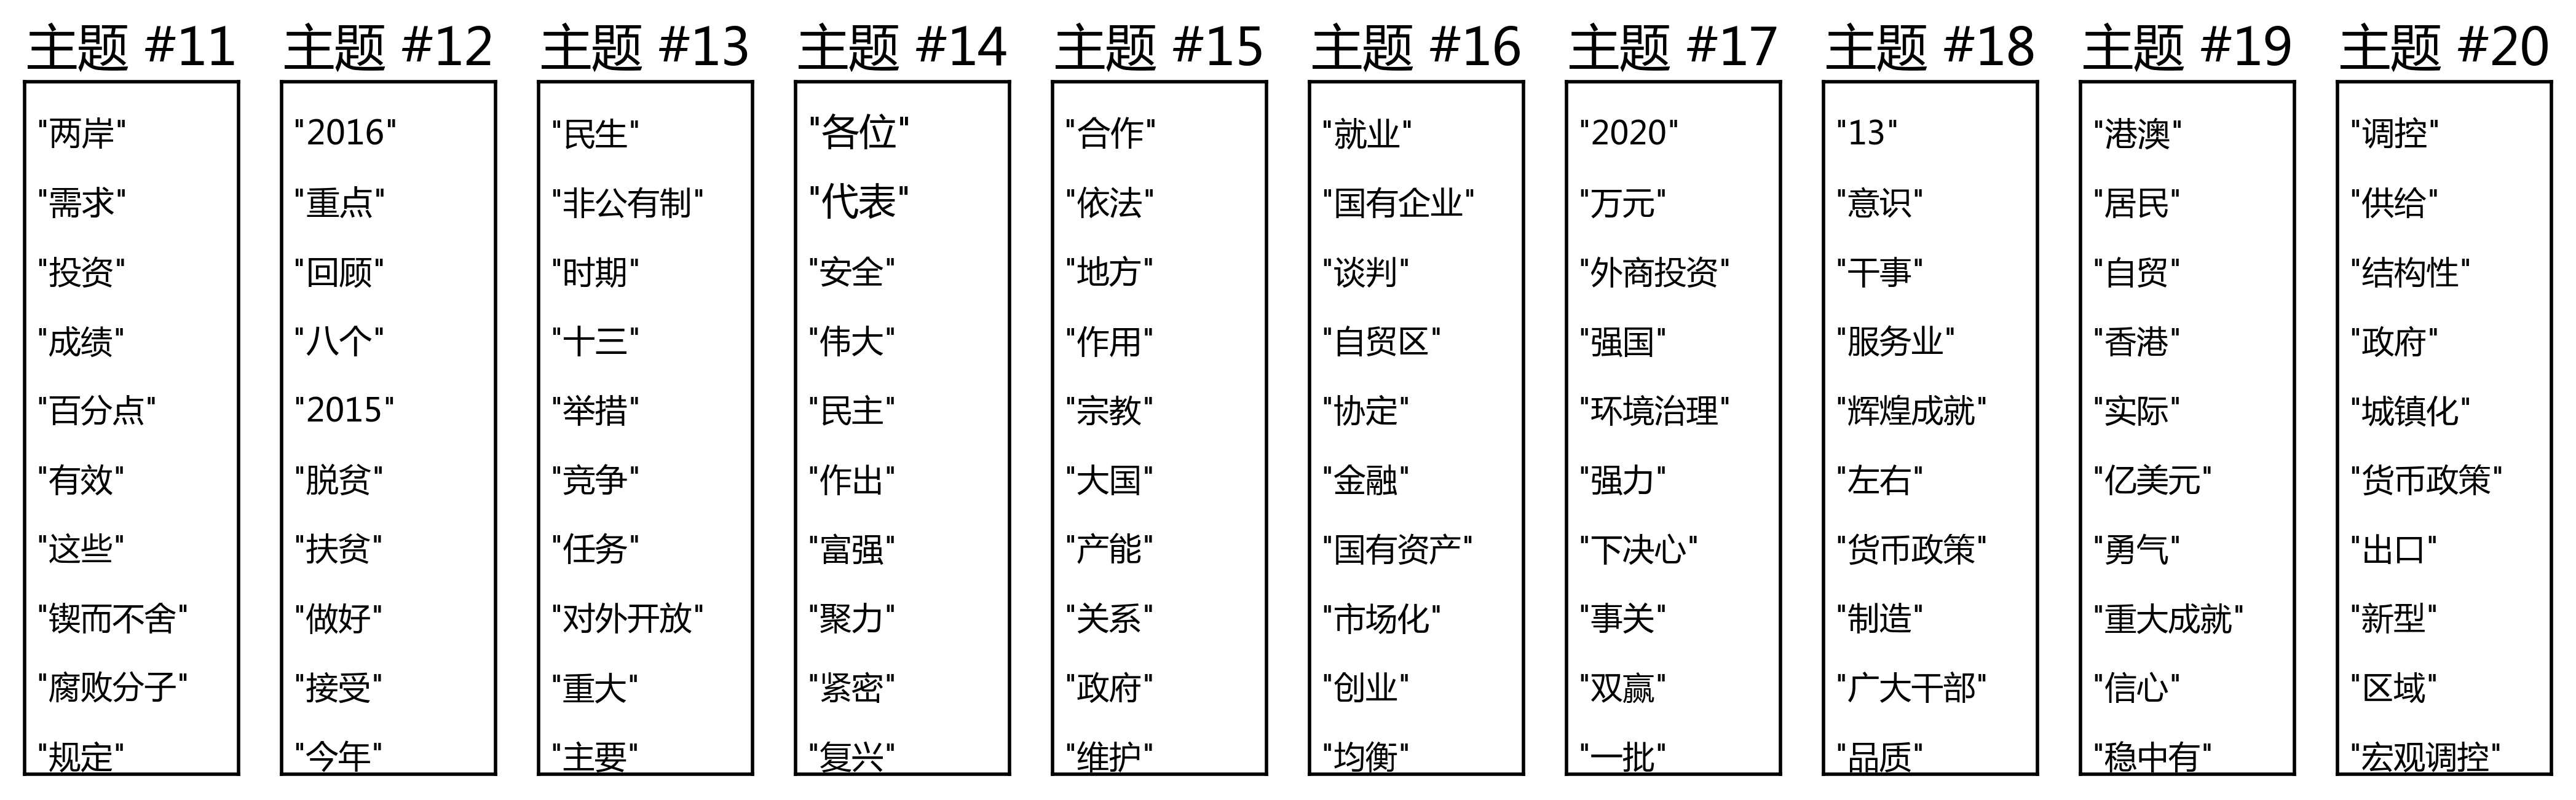

In [123]:
plotTopics(10, 20)

# 对宋词进行主题分析初探

宋词数据下载 http://cos.name/wp-content/uploads/2011/03/SongPoem.tar.gz

In [2]:
import pandas as pd

In [9]:
pdf = pd.read_csv('./data/SongPoem.csv', encoding = 'gb18030')

pdf[:3]

Page Author Title Title2  \
0  0001.1     和岘    导引     导引   
1  0001.2     和岘    六州     六州   
2  0001.3     和岘   十二时    忆少年   

                                            Sentence  
0  气和玉烛，叡化着鸿明。缇管一阳生。郊禋盛礼燔柴毕，旋轸凤凰城。森罗仪卫振华缨。载路溢欢声。皇...  
1  严夜警，铜莲漏迟迟。清禁肃，森陛戟，羽卫俨皇闱。角声励，钲鼓攸宜。金管成雅奏，逐吹逶迤。荐苍...  
2  承宝运，驯致隆平。鸿庆被寰瀛。时清俗阜，治定功成。遐迩咏由庚。严郊祀，文物声明。会天正、星拱...

In [124]:
len(pdf)

20692

In [10]:
poems = pdf.Sentence

In [125]:
import gensim

processed_docs = [cleancntxt(doc, stopwords) for doc in poems]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print ("In the corpus there are", len(word_count_dict), "unique tokens")
# word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
# print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]



In the corpus there are 147177 unique tokens


In [126]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)


In [130]:
# 使用并行LDA加快处理速度。 
lda_model2 = gensim.models.ldamulticore.LdaMulticore(corpus=None, num_topics=20, id2word=word_count_dict,\
                                        workers=None, chunksize=2000, passes=1, \
                                        batch=False, alpha='symmetric', eta=None, \
                                        decay=0.5, offset=1.0, eval_every=10, \
                                        iterations=50, gamma_threshold=0.001, random_state=None)


In [132]:
lda_model2.print_topics(3)

[(14,
  u'0.000*"\u5bab\u58f6" + 0.000*"\u5a25\u7709" + 0.000*"\u5c11\u7384" + 0.000*"\u7ea2\u8865\u7fe0" + 0.000*"\u5bd2\u7981" + 0.000*"\u6069\u6ce2\u6e3a" + 0.000*"\u6210\u7b11" + 0.000*"\u4e00\u65b9" + 0.000*"\u632f\u4f69" + 0.000*"\u5343\u6761"'),
 (3,
  u'0.000*"\u7b11\u6885" + 0.000*"\u98de\u7fe5" + 0.000*"\u751a\u5904\u5e02" + 0.000*"\u7076\u59d4\u5ca9" + 0.000*"\u58f0\u4e91\u5916" + 0.000*"\u8bd7\u9b13\u7a7a" + 0.000*"\u9999\u5e15" + 0.000*"\u4e00\u5411" + 0.000*"\u559c\u8fd1" + 0.000*"\u8349\u5e26"'),
 (9,
  u'0.000*"\u9189\u5f52\u82b1" + 0.000*"\u96e8\u9701\u9ad8\u70df" + 0.000*"\u79c1\u81ea" + 0.000*"\u5c1a\u4e8e" + 0.000*"\u5ba2\u4e91" + 0.000*"\u4ea4\u8a89" + 0.000*"\u7f18\u529b" + 0.000*"\u9ad8\u4eba\u53f3" + 0.000*"\u7814\u971c" + 0.000*"\u751f\u60b2"')]

In [133]:
topictermlist = lda_model2.print_topics(-1)
top_words = [[j.split('*')[1] for j in i[1].split(' + ')] for i in topictermlist] 
for k, i in enumerate(top_words): 
    print (k+1, " ".join(i) )

1 "杯面" "衡任" "鹊声" "东瓯" "毛遂" "狂胡" "金横带" "为民" "贪欢适" "女骋"
2 "事关" "长不昧" "扑鼻" "印曲花" "千亿" "悲似" "成絮" "绿须" "辗柔茵" "中眉"
3 "此等" "半疑" "菜传" "羞郎觑" "工艺" "翠翘花" "苦自" "闲发" "正梅粉" "愁梦欲"
4 "笑梅" "飞翥" "甚处市" "灶委岩" "声云外" "诗鬓空" "香帕" "一向" "喜近" "草带"
5 "合姓" "入户" "生青雾" "千掌" "佳兆" "平镜" "脉脉" "几间" "留春语" "先递"
6 "松路" "菊荒" "苎萝" "涌大" "波平岸" "任城" "题桐叶" "三三五五" "望仙官" "景疏"
7 "幽欢整" "虔祈" "步鸯" "开口笑" "怨深" "列郡" "风拂罗衣" "似途" "恨苦" "情忠武"
8 "粟粟" "报临" "摩孩罗" "半嗔" "虚野" "倚定" "欲语" "夷夏高仰" "看君行" "未伊瘦损"
9 "刺萦" "适忘鱼" "困流霞" "犀隐" "只弹" "幼稚" "花阴淡" "恐山深" "盘山" "今底"
10 "醉归花" "雨霁高烟" "私自" "尚于" "客云" "交誉" "缘力" "高人右" "研霜" "生悲"
11 "休为" "迷舞凤" "惬邻" "愁味" "解禁" "一物" "亭北" "催庭树" "梦翠翘" "披蕊"
12 "老此" "横塘处" "这闲福" "初不悟" "花满碧蹊归" "纵巧" "放荡" "歌者" "要称" "先泪"
13 "筹密边" "任碧罗" "犹闻" "秋霁碧" "瘦千崖" "翠如葱" "休争" "爱此" "辅盈成" "蒸民"
14 "送日眺" "事皆非" "顶头" "储秀降" "济水" "良日" "辜伊" "岫边" "若耶溪" "空歇"
15 "宫壶" "娥眉" "少玄" "红补翠" "寒禁" "恩波渺" "成笑" "一方" "振佩" "千条"
16 "开景运" "休治" "争映" "明时" "念羁" "天末家" "点墨" "春权" "丝弦" "盈畴"
17 "情念骤" "上林" "侵染" "香高烛" "心许" "裂石" "兽烟" "麦光" "符梦" "尘想"
18 "别郎" "庐中" "不待禁" "整冠落" "同摘" "穿线" "细草芳" "村姑

In [137]:
perplexity_list = [fastInferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

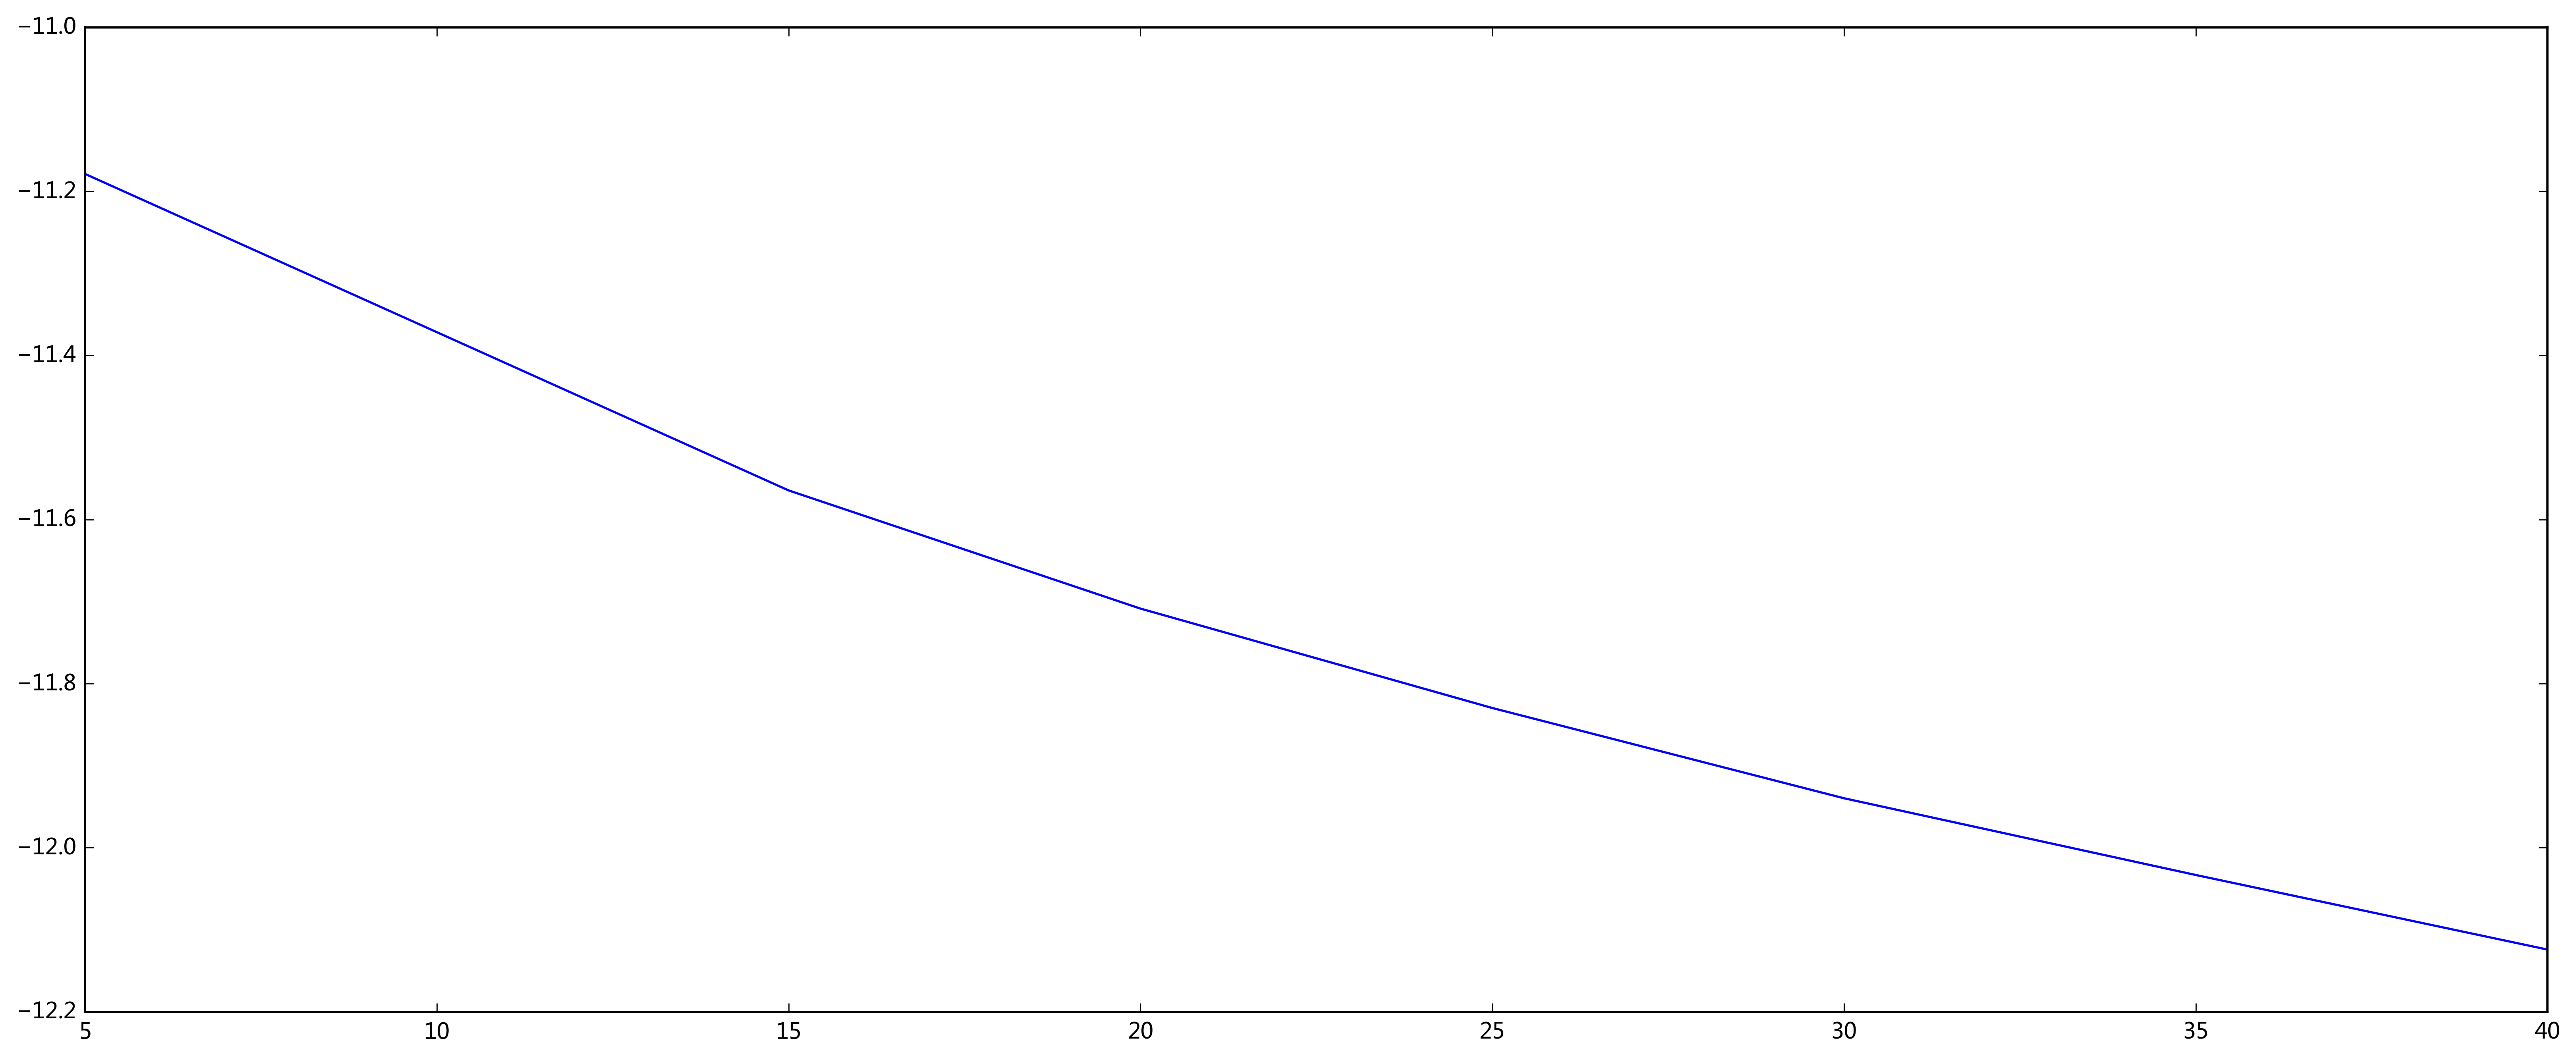

In [138]:
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)
plt.show()

In [140]:
import pyLDAvis.gensim

song_data = pyLDAvis.gensim.prepare(lda_model, bag_of_words_corpus, word_count_dict)

In [141]:
pyLDAvis.enable_notebook()
pyLDAvis.show(song_data)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [21/Sep/2017 22:29:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Sep/2017 22:29:23] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [21/Sep/2017 22:29:23] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [21/Sep/2017 22:29:23] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


# 阅读材料

Willi Richert, Luis Pedro Coelho, 2013, Building Machine Learning Systems with Python. Chapter 4. Packt Publishing.

LDA Experiments on the English Wikipedia https://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation

东风夜放花千树：对宋词进行主题分析初探 https://chengjunwang.com/zh/post/cn/2013-09-27-topic-modeling-of-song-peom/

Chandra Y, Jiang LC, Wang C-J (2016) Mining Social Entrepreneurship Strategies Using Topic Modeling. PLoS ONE 11(3): e0151342. doi:10.1371/journal.pone.0151342

https://rare-technologies.com/tutorial-on-mallet-in-python/